# Part I - (IBM HR - Employee Attrition Analysis)
## by Trevlyin M I Muzinda

## Introduction

The HR Employee Attrition dataset is a fictional dataset pulled together by IBM specialists and made available through the [data.world](https://data.world/aaizemberg/hr-employee-attrition) platform. It contains information on employees demographic and other situational standings with attrition status.

> Attrition is defined by [Gatner](https://www.gartner.com/en/human-resources/glossary/attrition#:~:text=Attrition%20is%20the%20departure%20of,%2C%20termination%2C%20death%20or%20retirement.) as the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement. **Attrition rate** is the rate at which employees leave an organization divided by the average number of employees at the organization over a given period of time.

Some of the ordinal categorical variables in the dataset was given a rating attained from the same author via [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset):

`Education`

1 'Below College'

2 'College'

3 'Bachelor'

4 'Master'

5 'Doctor'

`EnvironmentSatisfaction`

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

`JobInvolvement`

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

`JobSatisfaction`

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

`PerformanceRating`

1 'Low'

2 'Good'

3 'Excellent'

4 'Outstanding'

`RelationshipSatisfaction`

1 'Low'

2 'Medium'

3 'High'

4 'Very High'

`WorkLifeBalance`

1 'Bad'

2 'Good'

3 'Better'

4 'Best'


### Research Questions

The goal of this analysis is to attain the attrition rate and the possible factors which may give rise or decrease to this rate. Hence the questions will be formulated on the basis on the features that have an effect on the target `Attrition`.



## Preliminary Wrangling


In [161]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [162]:
#Loading dataset
df_hr = pd.read_csv('./HR-Employee-Attrition.tsv.txt', sep='\t')
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [163]:
# looking at the dataset structure (rows, columns)
df_hr.shape

(1470, 35)

In [164]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [165]:
#summary for numeric dtypes
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [166]:
#summary for non numeric dtypes
df_hr.select_dtypes(object).describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### What is the structure of your dataset?

The dataset contains 1470 rows by 35 columns, and have 9 object and 26 int datatypes. There are no missing values but there is a duplicated column the `Over18` column which contains the Y value, assumptions being it was used to trim employees who are 18 or older. Other than that there are a few cleaning issues which involves datatypes, where most columns are categorical and will be done after choosing the features to be used in this analysis.

### What is/are the main feature(s) of interest in your dataset?

For this analysis we will be taking into account all variables that has a relationship or an effect with employee attrition rate, hence the `Attrition` variable is the suitable choice for the target variable.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features which will enable this investigation using this dataset are guided by employees' demographic and quality of work and work environment. It was also influence by a blog under an HR Consultant based in the UK, [peepshr](https://www.peepshr.co.uk/resource-centre/7-common-causes-of-high-employee-turnover/), which highlights 7 common causes of high employee turnover. Turnover is a subset of attrition thus I decided to also add job involvement for the employee and variables to determine how frequent they changed companies may help in determining an involuntary attrition:
 - Age
- Gender
- MaritalStatus
- Department
- Education
- BusinessTravel
- EnvironmentSatisfaction
- WorkLifeBalance
- OverTime
- YearsInCurrentRole
- YearsWithCurrManager
- YearsSinceLastPromotion
- PercentSalaryHike
- NumCompaniesWorked
- TrainingTimesLastYear
- TotalWorkingYears
- JobInvolvement
- JobSatisfaction

But the analysis will be centered on the features which have a correlated relationship with the target *attrition*.

In [167]:
# Trim down dataset
features = ['Age','Attrition','Gender','MaritalStatus','Department','Education','EnvironmentSatisfaction',
            'BusinessTravel','WorkLifeBalance','OverTime', 'YearsInCurrentRole','YearsWithCurrManager',
            'YearsSinceLastPromotion','PercentSalaryHike', 'NumCompaniesWorked','TrainingTimesLastYear','TotalWorkingYears',
            'JobInvolvement','JobSatisfaction']
analysis_hr = df_hr[features].copy()
analysis_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Gender                   1470 non-null   object
 3   MaritalStatus            1470 non-null   object
 4   Department               1470 non-null   object
 5   Education                1470 non-null   int64 
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   BusinessTravel           1470 non-null   object
 8   WorkLifeBalance          1470 non-null   int64 
 9   OverTime                 1470 non-null   object
 10  YearsInCurrentRole       1470 non-null   int64 
 11  YearsWithCurrManager     1470 non-null   int64 
 12  YearsSinceLastPromotion  1470 non-null   int64 
 13  PercentSalaryHike        1470 non-null   int64 
 14  NumCompaniesWorked       1470 non-null  

Now the data at hand contains 18 variables which will be sufficient in this analysis. There are some datatypes that needs to be changed, starting with the `Attrition` and `OverTime` variables where possible values are *Yes* and *No*, but these can be better represented as a boolean datatype

In [168]:
# checking if values in Attrition and OverTime are the same to combine cleaning operation
assert all(analysis_hr['Attrition'].unique() == analysis_hr['OverTime'].unique())

In [169]:
analysis_hr[['Attrition','OverTime']] = analysis_hr[['Attrition','OverTime']].replace({'Yes': True, 'No': False})

In [170]:
analysis_hr[['Attrition','OverTime']].dtypes

Attrition    bool
OverTime     bool
dtype: object

Change back to word ratings for `Education`, `WorkLifeBalance`, `EnvironmentSatisfaction`, `RelationshipSatisfaction`, `JobInvolvement`, and `JobSatisfaction` variables with guidance in the **Introduction** section.

In [171]:
low_vhigh = {1:'Low',2:'Medium',3:'High',4:'Very High'} # all variables ending with satisfaction and one jobinvolvement
workLife = {1:'Bad',2:'Good',3:'Better',4:'Best'} # for WorkLifeBalance variable
educlass = {1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'} # education variable

low_vhigh_vars = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction']

analysis_hr[low_vhigh_vars] = analysis_hr[low_vhigh_vars].replace(low_vhigh)
analysis_hr['WorkLifeBalance'] = analysis_hr['WorkLifeBalance'].replace(workLife)
analysis_hr['Education'] = analysis_hr['Education'].replace(educlass)

In [172]:
# Convert low to very high rated variables into ordered categorical types
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                            categories = ['Low','Medium','High','Very High'])
analysis_hr[low_vhigh_vars] = analysis_hr[low_vhigh_vars].astype(ordered_var)

In [173]:
# convert education and worklifebalance into ordered categorical types
ordinal_var_dict = {'WorkLifeBalance': ['Bad', 'Good', 'Better', 'Best'],
                    'Education': ['Below College', 'College', 'Bachelor','Master','Doctor'],
                    'BusinessTravel': ['Non-Travel','Travel_Rarely','Travel_Frequently']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    analysis_hr[var] = analysis_hr[var].astype(ordered_var)
   

In [174]:
# convert remaining object variables which do not need ordering
object_nominal = analysis_hr.select_dtypes(object)
analysis_hr[object_nominal.columns] = analysis_hr[object_nominal.columns].astype('category')

In [175]:
analysis_hr.dtypes

Age                           int64
Attrition                      bool
Gender                     category
MaritalStatus              category
Department                 category
Education                  category
EnvironmentSatisfaction    category
BusinessTravel             category
WorkLifeBalance            category
OverTime                       bool
YearsInCurrentRole            int64
YearsWithCurrManager          int64
YearsSinceLastPromotion       int64
PercentSalaryHike             int64
NumCompaniesWorked            int64
TrainingTimesLastYear         int64
TotalWorkingYears             int64
JobInvolvement             category
JobSatisfaction            category
dtype: object

## Groundwork.

In this chapter we will be looking at the target feature `attrition` as we attain the global rate and move on to group rates. This is foundational to find dependent features to the target and hopefully uncover how they relate.

### I. What is the global attrition rate?

The **attrition rate** is the probability of an employee to be part of the attrition sample. Determining **attrition rate** will help in highlighting or uncovering possible factors that lead employees to depart from the company.


In [176]:
## Referenced from: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

def addlabels_top(x,y):
    for i in range(x.min(),(x.min()+len(x))):
        plt.text(i, y[i]+2, y[i], ha = 'center') # add bar labels with padding

In [177]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, y[i], ha = 'center', color='white')

In [178]:
attrition_rates = round(analysis_hr['Attrition'].value_counts(normalize=True),2)
attrition_rates[True]

0.16

In [179]:
attrition_count = analysis_hr['Attrition'].value_counts()

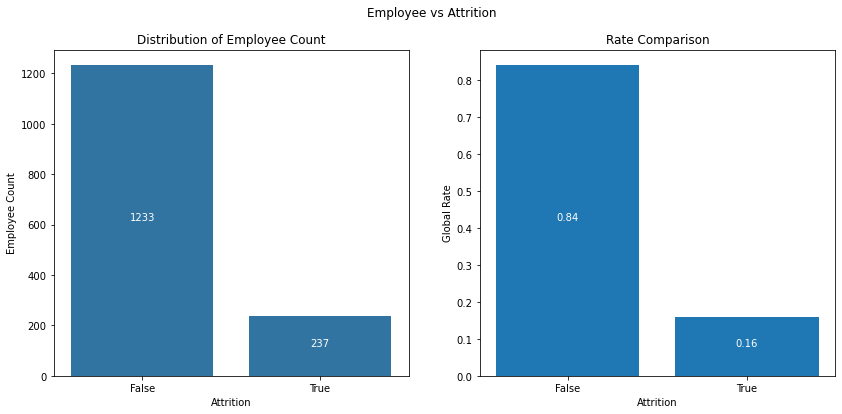

In [180]:
plt.figure(figsize=(14,6))
plt.suptitle('Employee vs Attrition')

plt.subplot(1,2,1)
sb.countplot(data=analysis_hr, x='Attrition', color=sb.color_palette()[0])
addlabels(analysis_hr['Attrition'].unique(), attrition_count)
plt.ylabel('Employee Count')
plt.xlabel('Attrition')
plt.title('Distribution of Employee Count');

plt.subplot(1,2,2)
plt.bar(attrition_rates.index, attrition_rates)
addlabels(analysis_hr['Attrition'].unique(), attrition_rates)
plt.xlabel('Attrition')
plt.ylabel('Global Rate')
plt.xticks([0,1],attrition_rates.index)
plt.title('Rate Comparison');

In [181]:
global_mean = round(attrition_rates[True], 2)
global_mean

0.16

Among the 237 employee who left the company caused a 16% attrition mean and those who did not accounted for 1233 employees. Later in the Bivariate Chapter we will see an overview of this rate compared to group rate, the attrition rate in each column/variable. 

### II. Which numerical features have influence over the Attrition Rate

In [182]:
numerics = analysis_hr.select_dtypes(int).columns
numerics

Index(['Age', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'YearsSinceLastPromotion', 'PercentSalaryHike', 'NumCompaniesWorked',
       'TrainingTimesLastYear', 'TotalWorkingYears'],
      dtype='object')

In [183]:
corr_attrition = analysis_hr[numerics].corrwith(analysis_hr['Attrition'])
corr_attrition

Age                       -0.159205
YearsInCurrentRole        -0.160545
YearsWithCurrManager      -0.156199
YearsSinceLastPromotion   -0.033019
PercentSalaryHike         -0.013478
NumCompaniesWorked         0.043494
TrainingTimesLastYear     -0.059478
TotalWorkingYears         -0.171063
dtype: float64

It seems that the numerical variables have no influence over the outcome of the target varibale, Attrition, but do they have any relationship with each other?

<AxesSubplot:>

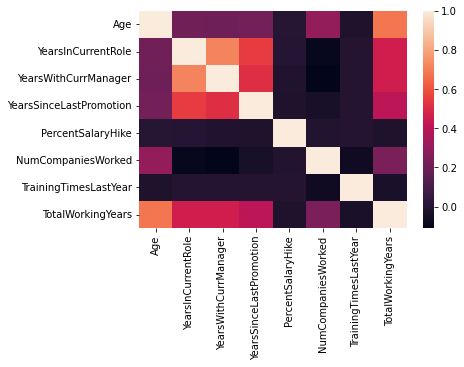

In [184]:
sb.heatmap(analysis_hr[numerics].corr())

### III. Which Categorical features that have relation to Attrition Rate?

Having attained the global attrition rate of 16%, in this section we will be comparing it to group attrition rates.In doing this we will be attaining the risk ratio which is defined as,

> <div>In statistics, the ratio between probabilities
in different groups is called the risk ratio, where risk refers to the risk of having
the effect. <br><br><div style='text-align: right; font-style: italic'>Grigorev, A.(2021). Machine Learning Bookcamp: Build a Portfolio of Real-life Projects. Manning </div></div>

In [185]:
# set categorical features in a list
categorical = analysis_hr.select_dtypes(['category','bool']).columns
categorical = categorical.drop('Attrition')

First, we need to calculate the group attrition mean, the attrition risk and difference between the global and group mean. This gives an overview of features with high attrition risk, but also the ones with little to no risk will be accounted for, which will be the focus of further exploration in this section.

In [186]:
## Ref: Grigorev, A.(2021). Machine Learning Bookcamp: Build a Portfolio of Real-life Projects. Manning. pg 83
from IPython.display import display


# print group rate for all categorical values
for col in categorical:
    df_group = analysis_hr.groupby(col)['Attrition'].agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    
    display(df_group)
    

,mean,diff,risk
Gender,,,
Female,0.147959,-0.012041,0.924745
Male,0.170068,0.010068,1.062925


,mean,diff,risk
MaritalStatus,,,
Divorced,0.100917,-0.059083,0.630734
Married,0.124814,-0.035186,0.780089
Single,0.255319,0.095319,1.595745


,mean,diff,risk
Department,,,
Human Resources,0.190476,0.030476,1.190476
Research & Development,0.138398,-0.021602,0.864984
Sales,0.206278,0.046278,1.289238


,mean,diff,risk
Education,,,
Below College,0.182353,0.022353,1.139706
College,0.156028,-0.003972,0.975177
Bachelor,0.173077,0.013077,1.081731
Master,0.145729,-0.014271,0.910804
Doctor,0.104167,-0.055833,0.651042


,mean,diff,risk
EnvironmentSatisfaction,,,
Low,0.253521,0.093521,1.584507
Medium,0.149826,-0.010174,0.936411
High,0.136865,-0.023135,0.855408
Very High,0.134529,-0.025471,0.840807


,mean,diff,risk
BusinessTravel,,,
Non-Travel,0.080000,-0.080000,0.500000
Travel_Rarely,0.149569,-0.010431,0.934803
Travel_Frequently,0.249097,0.089097,1.556859


,mean,diff,risk
WorkLifeBalance,,,
Bad,0.312500,0.152500,1.953125
Good,0.168605,0.008605,1.053779
Better,0.142217,-0.017783,0.888858
Best,0.176471,0.016471,1.102941


,mean,diff,risk
OverTime,,,
False,0.104364,-0.055636,0.652277
True,0.305288,0.145288,1.908053


,mean,diff,risk
JobInvolvement,,,
Low,0.337349,0.177349,2.108434
Medium,0.189333,0.029333,1.183333
High,0.144009,-0.015991,0.900058
Very High,0.090278,-0.069722,0.564236


,mean,diff,risk
JobSatisfaction,,,
Low,0.228374,0.068374,1.427336
Medium,0.164286,0.004286,1.026786
High,0.165158,0.005158,1.032240
Very High,0.113290,-0.046710,0.708061


Among the categorical value in variables with high attrition risk(a risk close to 2.0) were:
1. MaritalStatus
2. EnvironmentSatisfaction
3. BusinessTravel
4. WorkLifeBalance
5. OverTime
6. JobInvolvement

`Gender` has the same risk as the rest of the population as well as `Department` but Research and Development is significantly lower than 0.9. All `Education` values round off to 1 meaning they also have approximately the same risk as the global mean. Last but not least `JobSatisfaction` has the same outcome but Low Job Satisfaction seems to show a close proximity to high attrition risk.

In [187]:
attrition = analysis_hr['Attrition'] == 1
no_attrition = analysis_hr['Attrition'] == 0

## 1. Univariate Exploration


### 1.1. What is the age distribution among employees?

In the summary statistics printed above, we see a range of age between 18-60 years old but how is it distributed across the dataset?

In [188]:
analysis_hr['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [189]:
ages = analysis_hr['Age'].value_counts(sort=False)
ages.index.min()
ages = ages.sort_index()
ages.loc[30:41]

30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
Name: Age, dtype: int64

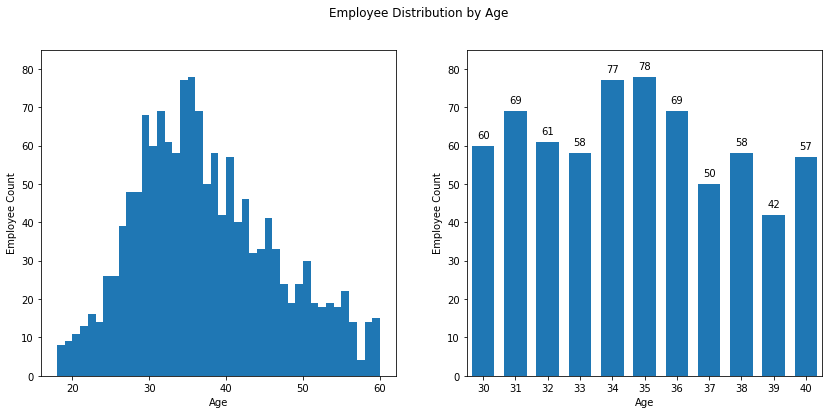

In [190]:
# age distribution
plt.figure(figsize=(14,6))
plt.suptitle('Employee Distribution by Age')
plt.subplot(1,2,1)
bins = np.arange(18, analysis_hr['Age'].max()+1,1)
plt.hist(data=analysis_hr,x='Age', bins=bins)
plt.ylim(top=85)
plt.xlabel('Age')
plt.ylabel('Employee Count');

# Zoom to most concentrated peak
plt.subplot(1,2,2)
bins = np.arange(17.5, 60.5+1,1)
plt.hist(data=analysis_hr,x='Age', bins=bins, rwidth=0.7)
addlabels_top(np.arange(30,41,1), ages.loc[30:41])
plt.xticks(np.arange(18,60+1,1))
plt.xlim(29.5,40.5)
plt.ylim(top=85)
plt.xlabel('Age')
plt.ylabel('Employee Count');

The distribution shows that the data has one mode around the age of 35 years with 78 employees and a close second with 77 employees are aged 34.

### 1.2. Which gender attains the most employees?

In [191]:
gender_perc = analysis_hr['Gender'].value_counts(normalize=True)
gender_perc

Male      0.6
Female    0.4
Name: Gender, dtype: float64

In [192]:
gender = analysis_hr['Gender'].value_counts()
gender

Male      882
Female    588
Name: Gender, dtype: int64

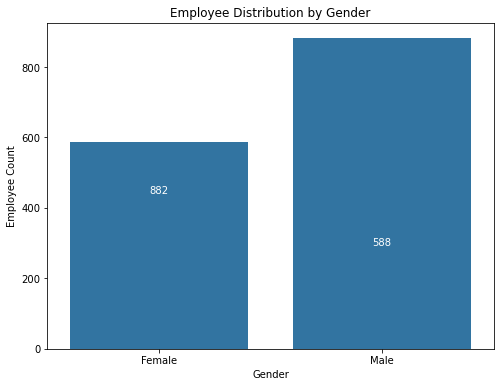

In [193]:
plt.figure(figsize=(8,6))

sb.countplot(data=analysis_hr, x='Gender', color=sb.color_palette()[0])
plt.ylabel('Employee Count')
plt.xlabel('Gender')
addlabels(['Male','Female'], analysis_hr['Gender'].value_counts())
plt.title('Employee Distribution by Gender');

Female employees occupy about 40% of our dataset with 588 employees while Male employees dominate with 882 occupancy that makes up the rest.

### 1.3. Which Marital Status is dominant among employees?

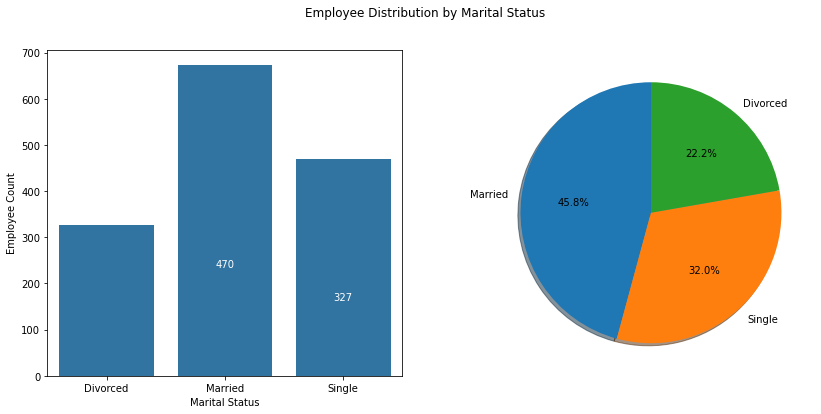

In [194]:
plt.figure(figsize=(14,6))
plt.suptitle('Employee Distribution by Marital Status')

plt.subplot(1,2,1)
sb.countplot(data=analysis_hr, x='MaritalStatus', color=sb.color_palette()[0])
plt.ylabel('Employee Count')
plt.xlabel('Marital Status')
addlabels(analysis_hr['MaritalStatus'].unique(), analysis_hr['MaritalStatus'].value_counts());

plt.subplot(1,2,2)
# MaritalStatus piechart
marital_perc = analysis_hr['MaritalStatus'].value_counts(normalize=True)
plt.pie(marital_perc, labels=marital_perc.index,autopct='%1.1f%%',
        shadow=True, startangle=90);

673 married employees occupy 45.8% , 470 being single with 32% occupancy and the smallest slice are 327 divorced who are 22.2% of the entire population. 

### 1.4. How was business travel distributed among employees?

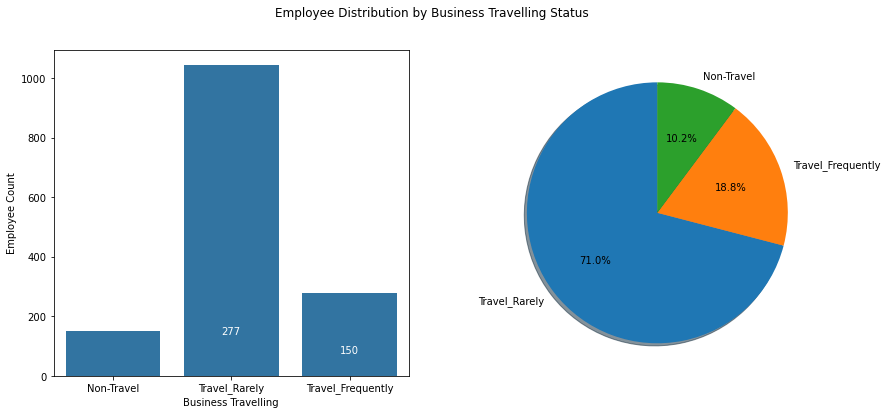

In [195]:
plt.figure(figsize=(14,6))
plt.suptitle('Employee Distribution by Business Travelling Status')

plt.subplot(1,2,1)
sb.countplot(data=analysis_hr, x='BusinessTravel', color=sb.color_palette()[0])
plt.ylabel('Employee Count')
plt.xlabel('Business Travelling')
addlabels(analysis_hr['BusinessTravel'].unique(), analysis_hr['BusinessTravel'].value_counts());

plt.subplot(1,2,2)
# BusinessTravel piechart
businessTravel_perc = analysis_hr['BusinessTravel'].value_counts(normalize=True)
plt.pie(businessTravel_perc, labels=businessTravel_perc.index,autopct='%1.1f%%',
        shadow=True, startangle=90);


1043(71%) employees travel rarely, 277(18.8%) of them travel frequently and only 150(10.2%) of them do not travel for business in their current positions.

### 1.6. How many employees tend to work overtime?

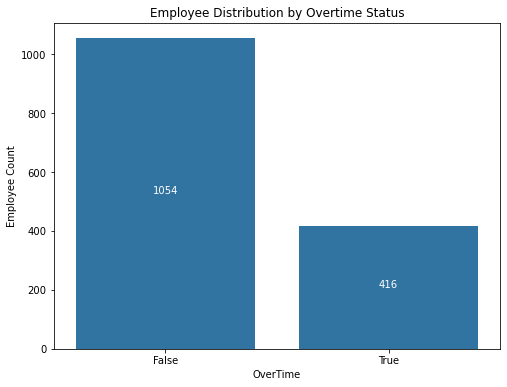

In [196]:
plt.figure(figsize=(8,6))

sb.countplot(data=analysis_hr, x='OverTime', color=sb.color_palette()[0])
plt.ylabel('Employee Count')
plt.xlabel('OverTime')
addlabels(analysis_hr['OverTime'].unique(), analysis_hr['OverTime'].value_counts())
plt.title('Employee Distribution by Overtime Status');


Only 416 employees seem to work overtime and 1054 of them tend to stick to the disputed working hours within their job role.

### 1.7. How is the Work-Life Balance for the employees?

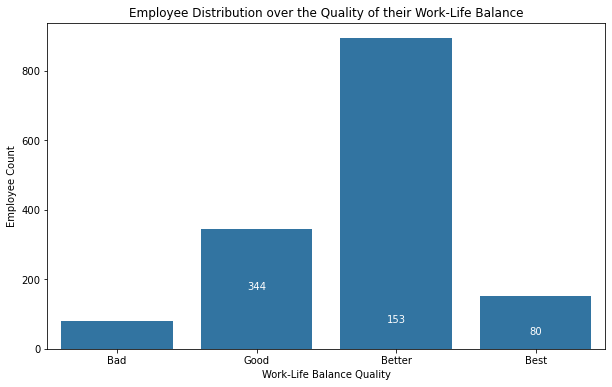

In [197]:
plt.figure(figsize=(10,6))
sb.countplot(data=analysis_hr, x='WorkLifeBalance', color=sb.color_palette()[0])
plt.ylabel('Employee Count')
plt.xlabel('Work-Life Balance Quality')
addlabels(analysis_hr['WorkLifeBalance'].unique(), analysis_hr['WorkLifeBalance'].value_counts())
plt.title('Employee Distribution over the Quality of their Work-Life Balance');

893 employees claim to have a better work-life balance, 344 with a good one, only 153 claim they have the best and a mere 80 claim to have a bad work-life balance. 

### 1.8. How involved are employees in their jobs

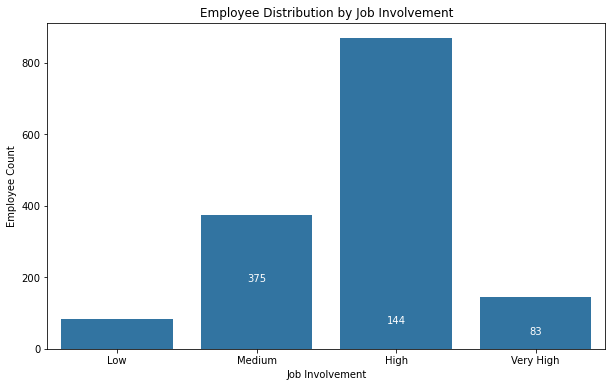

In [198]:
plt.figure(figsize=(10,6))
sb.countplot(data=analysis_hr, x='JobInvolvement', color=sb.color_palette()[0])
plt.ylabel('Employee Count')
plt.xlabel('Job Involvement')
addlabels(analysis_hr['JobInvolvement'].unique(), analysis_hr['JobInvolvement'].value_counts())
plt.title('Employee Distribution by Job Involvement');

Most employees accounting for 868 employees tend to have a high job involvement, 375 have medium, 144 employees are very involved in their job roles, and a low involvement is only partaken by 83 employees.

### 1.9. How do employees favor their working environment?

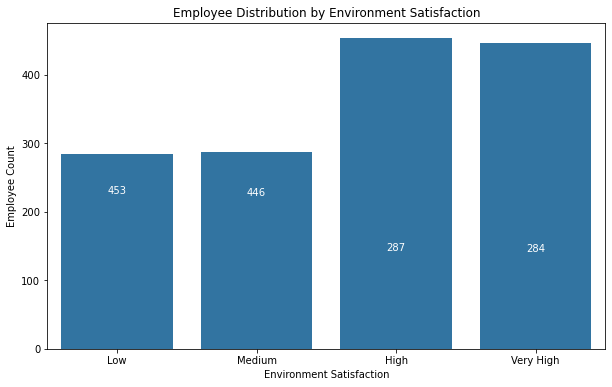

In [199]:
plt.figure(figsize=(10,6))
sb.countplot(data=analysis_hr, x='EnvironmentSatisfaction', color=sb.color_palette()[0])
plt.ylabel('Employee Count')
plt.xlabel('Environment Satisfaction')
addlabels(analysis_hr['EnvironmentSatisfaction'].unique(), analysis_hr['EnvironmentSatisfaction'].value_counts())
plt.title('Employee Distribution by Environment Satisfaction');

453 employees and 446 employees seem to favor the work environment with High and Very High ratings while 287 and 284 employees differed in their opinions where they expressed a Medium and Low rating respectively of how satisfied they were in their environments.

### 1.10. How is the experience spectrum spread out?

In [200]:
years_experience = analysis_hr['TotalWorkingYears'].value_counts(sort=False).sort_index()

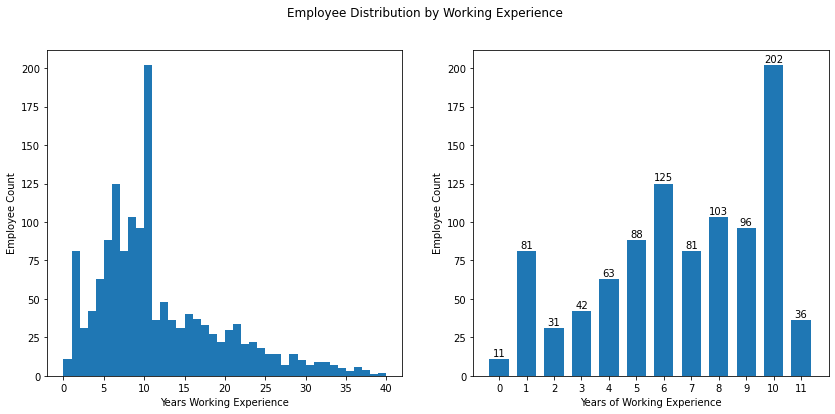

In [201]:
# years of working experience distribution
plt.figure(figsize=(14,6))
plt.suptitle('Employee Distribution by Working Experience')

plt.subplot(1,2,1)
bins = np.arange(0, analysis_hr['TotalWorkingYears'].max()+1,1)
plt.hist(data=analysis_hr,x='TotalWorkingYears', bins=bins)
# plt.xticks(np.arange(0,17+1,1))
plt.xlabel('Years Working Experience')
plt.ylabel('Employee Count');

# Zoom to most concentrated peak
plt.subplot(1,2,2)
bins = np.arange(-0.5, 11.5+1,1)
plt.hist(data=analysis_hr,x='TotalWorkingYears', bins=bins, rwidth=0.7)
plt.xticks(np.arange(0,11+1,1))
plt.xlim(right=12)
addlabels_top(years_experience.index[:12], years_experience[:12])
plt.xlabel('Years of Working Experience')
plt.ylabel('Employee Count');

The distribution is unimodal with most employees having 10 years of work experience. After the high peak occupied by 202 employees there is a sharp descent making it right skewed as less and less employees approach the 35-40 years of work experience.

### Conclusion

There were no transformations applied to the data except when making pie-charts where propotions was used instead of value counts and `TotalWokingYears` seems to have fewer employees as the number increased. Hence the data was commonly skewed to the right with many of them being unimodal.



Changing datatypes for `OverTime` and `Attrition` to boolean values while the rest of the 'object' datatypes was split into ordered categories and unordered categories.
There was no further cleaning needed as the data was relatively clean instead, because of the many variable, I trimmed it down to 11 columns from 35.

## 2. Bivariate Exploration


### 2.1. How does categorical features affect attrition?

As seen previously `MaritalStatus` had a high attrition risk in the Single group, but how does that compare to the rest of the groups when it comes to attrition.

In [202]:
# categorical group attrition means
df_ms = analysis_hr.groupby('MaritalStatus')['Attrition'].mean()
display(df_ms)

df_env = analysis_hr.groupby('EnvironmentSatisfaction')['Attrition'].mean()
display(df_env)

df_travel = analysis_hr.groupby('BusinessTravel')['Attrition'].mean()
display(df_travel)

df_workLife = analysis_hr.groupby('WorkLifeBalance')['Attrition'].mean()
display(df_workLife)

df_ot = analysis_hr.groupby('OverTime')['Attrition'].mean()
display(df_ot)

df_involved = analysis_hr.groupby('JobInvolvement')['Attrition'].mean()
display(df_involved)

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
Name: Attrition, dtype: float64

EnvironmentSatisfaction
Low          0.253521
Medium       0.149826
High         0.136865
Very High    0.134529
Name: Attrition, dtype: float64

BusinessTravel
Non-Travel           0.080000
Travel_Rarely        0.149569
Travel_Frequently    0.249097
Name: Attrition, dtype: float64

WorkLifeBalance
Bad       0.312500
Good      0.168605
Better    0.142217
Best      0.176471
Name: Attrition, dtype: float64

OverTime
False    0.104364
True     0.305288
Name: Attrition, dtype: float64

JobInvolvement
Low          0.337349
Medium       0.189333
High         0.144009
Very High    0.090278
Name: Attrition, dtype: float64

In [203]:
for x in df_ms.index:
    print(x)

Divorced
Married
Single


In [204]:
def max_spotlight(df):
    
    max_color = ['grey' if (x < df.max()) else 'darkorange' for x in df]
    return max_color

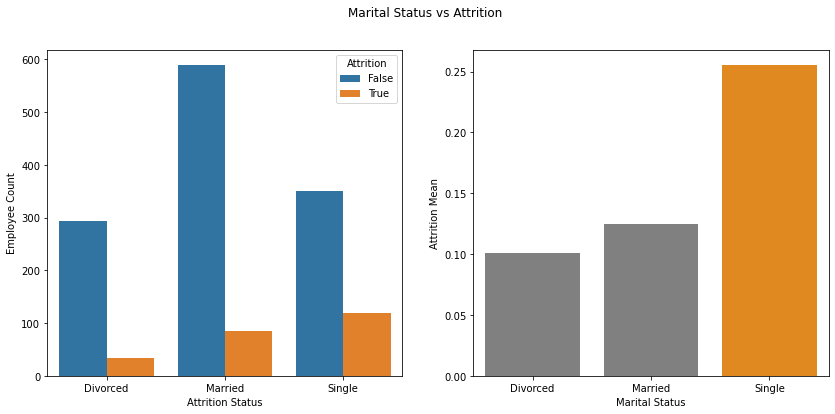

In [205]:
plt.figure(figsize=(14,6))

plt.suptitle('Marital Status vs Attrition')
plt.subplot(1,2,1)
sb.countplot(data=analysis_hr, hue='Attrition', x='MaritalStatus')
plt.ylabel('Employee Count')
plt.xlabel('Attrition Status');

plt.subplot(1,2,2)
sb.barplot(x=df_ms.index, y=df_ms, palette=max_spotlight(df_ms.sort_values()))
plt.ylabel('Attrition Mean')
plt.xlabel('Marital Status');

Single employees occupy 32% of the Marital Status Demographic but highlighted a large attrition group mean of 25.53%, ~205% and ~253% increase compared to its counterparts Married and Divorced respectively. Hence, keeping in mind the global rate being 16%, the Single employee group have an attrition risk of ~1.60 *(25.53/16)* resulting in high risk for attrition.  The latter Married and Divorced employees are at low risk of attrition as their risks are lower than 1.

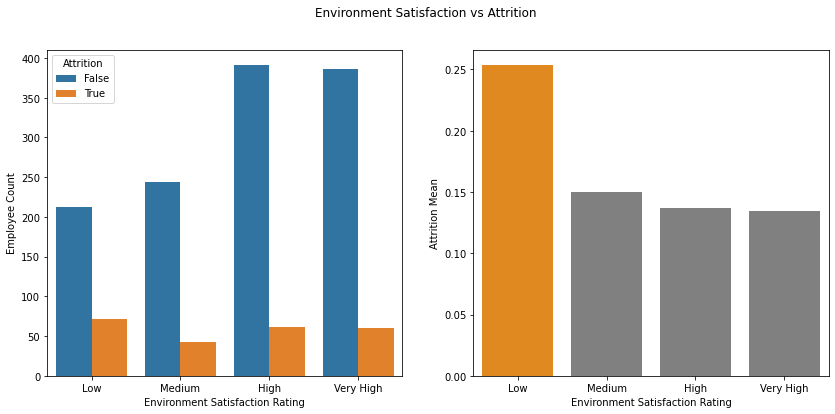

In [206]:
plt.figure(figsize=(14,6))

plt.suptitle('Environment Satisfaction vs Attrition')
plt.subplot(1,2,1)
sb.countplot(data=analysis_hr, hue='Attrition', x='EnvironmentSatisfaction')
plt.ylabel('Employee Count')
plt.xlabel('Environment Satisfaction Rating');

plt.subplot(1,2,2)
sb.barplot(x=df_env.index, y=df_env, palette=max_spotlight(df_env))
plt.ylabel('Attrition Mean')
plt.xlabel('Environment Satisfaction Rating');

`EnvironmentSatisfaction` variable exudes a negetive correlation as seen above on the figure to the right, the higher the satisfaction rating the lower the risk for employees to be part of the attrition sample. Employees who rated a low satisfaction for their environment are seen to have an attrition rate of 25.35%, a 2 times increase compared to other ratings, also resulting in high attrition risk.

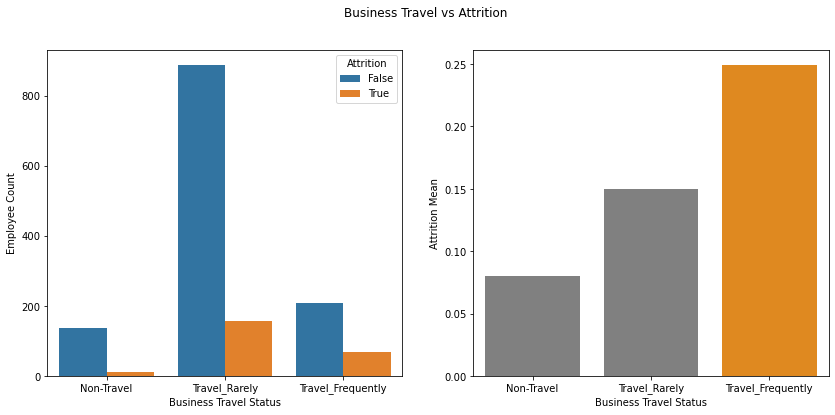

In [207]:
plt.figure(figsize=(14,6))

plt.suptitle('Business Travel vs Attrition')
plt.subplot(1,2,1)
sb.countplot(data=analysis_hr, hue='Attrition', x='BusinessTravel')
plt.ylabel('Employee Count')
plt.xlabel('Business Travel Status');

plt.subplot(1,2,2)
sb.barplot(x=df_travel.index, y=df_travel, palette=max_spotlight(df_travel))
plt.ylabel('Attrition Mean')
plt.xlabel('Business Travel Status');

Business travel frequency seems to have a positive effect/correlation on the average attrition rate for the group. As seen from Non-Travel employees have an 8% chance to leave the company which is 2 times less likely than any other employees. Employees who Travel_Rarely have a 1.87 times increase of being part of the attrition sample compared to its first counterpart. An attrition mean which resulted to be the highest in the group with 24.91% and qualifies as high risk, are employees with an approximate of 156% increased likelihood to be part of the attrition sample Travel_Frequently than the rest.

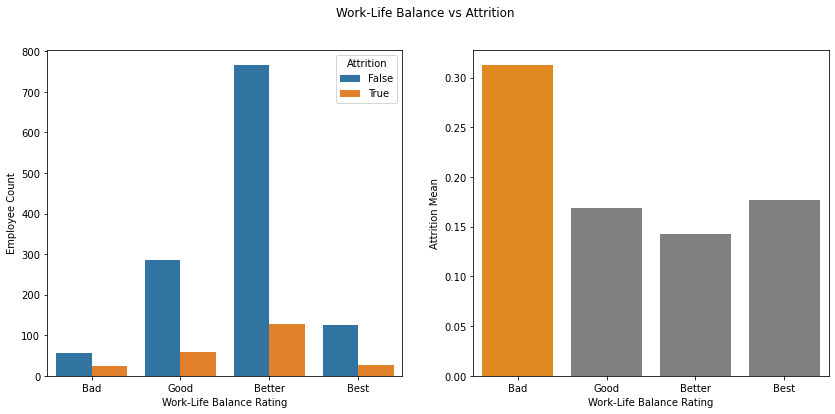

In [208]:
plt.figure(figsize=(14,6))

plt.suptitle('Work-Life Balance vs Attrition')
plt.subplot(1,2,1)
sb.countplot(data=analysis_hr, hue='Attrition', x='WorkLifeBalance')
plt.ylabel('Employee Count')
plt.xlabel('Work-Life Balance Rating');

plt.subplot(1,2,2)
sb.barplot(x=df_workLife.index, y=df_workLife, palette=max_spotlight(df_workLife))
plt.ylabel('Attrition Mean')
plt.xlabel('Work-Life Balance Rating');

The `WorkLifeBalance` vs `Attrition` mean resembles an unusual distribution where going up in work-life balance ratings the mean was decreasing, till we got to the Best rating where a sudden raise occured surpassing the Good rating by 0.79%. This outcome resulted in the rating making its stand as second to the Bad rating of ~177% increase of 31.25% average attrition for employees within this category. The sudden spike/increase will further be investigated so as to uncover as to why an employee with the best work-life balance would be part of the attrition sample.

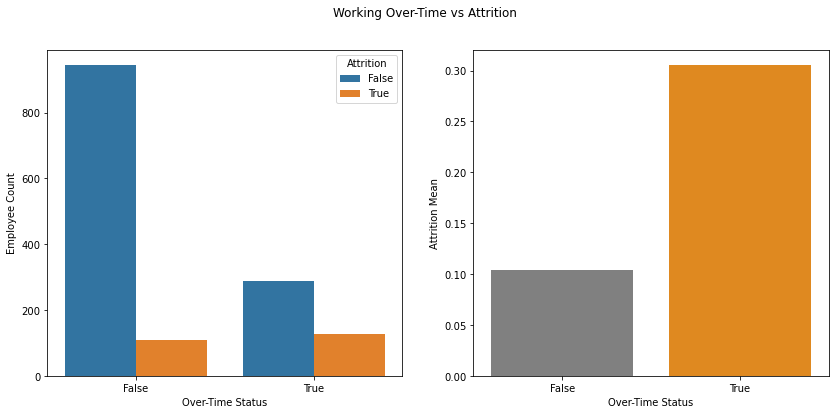

In [209]:
plt.figure(figsize=(14,6))

plt.suptitle('Working Over-Time vs Attrition')
plt.subplot(1,2,1)
sb.countplot(data=analysis_hr, hue='Attrition', x='OverTime')
plt.ylabel('Employee Count')
plt.xlabel('Over-Time Status');

plt.subplot(1,2,2)
sb.barplot(x=df_ot.index, y=df_ot, palette=max_spotlight(df_ot))
plt.ylabel('Attrition Mean')
plt.xlabel('Over-Time Status');

Employees who work Over-Time have a significantly higher attrition rate of 30.53% compared to the 10.44% of the employees who do not. Hence employees who tend to work past standard hours have a higher attrition risk than those who do not.

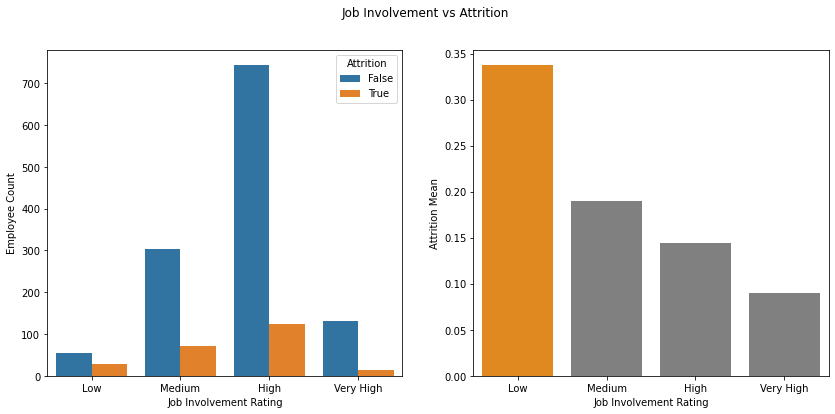

In [210]:
plt.figure(figsize=(14,6))

plt.suptitle('Job Involvement vs Attrition')
plt.subplot(1,2,1)
sb.countplot(data=analysis_hr, hue='Attrition', x='JobInvolvement')
plt.ylabel('Employee Count')
plt.xlabel('Job Involvement Rating');

plt.subplot(1,2,2)
sb.barplot(x=df_involved.index, y=df_involved, palette=max_spotlight(df_involved))
plt.ylabel('Attrition Mean')
plt.xlabel('Job Involvement Rating');

`JobInvolvement` and `Attrition` are negatively correlated where the more involved the employees are in their job, the less likely they are to contribute to the attrition rate. Employees who have Low involvement have a higher risk of 33.73% attrition rate while those who have Medium and High involvement tend to have the same risk as the rest of the employees. Employees who have Very High job involvement have a low risk which is ~1.78% lower than the global rate.

### 2.2 Does the company disregard Work Experience irregardless of Age?

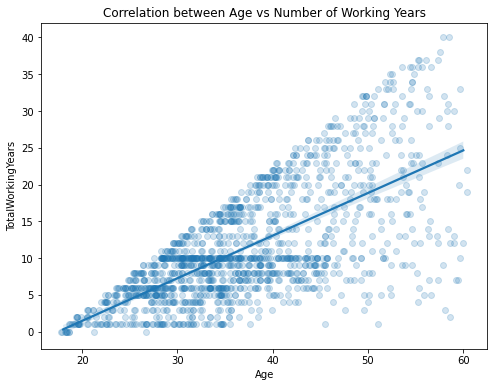

In [211]:
# Age vs TotalWorkingYears
plt.figure(figsize=(8,6))
sb.regplot(data=analysis_hr,x='Age', y='TotalWorkingYears', x_jitter=0.7, scatter_kws={'alpha':1/5})
plt.title('Correlation between Age vs Number of Working Years');

`Age` and `TotalWorkingYears` seems highly positively correlated clearly justifying that as employees age, their working years also increases but also depends on when the employee started working. The visualization that some start working from 18 while others start when the are older. Lets see a heatmap representation of this visual.

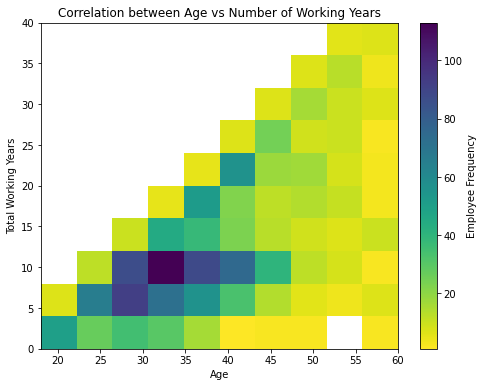

In [212]:
# Age vs TotalWorkingYears
plt.figure(figsize=(8,6))
plt.hist2d(data=analysis_hr,x='Age', y='TotalWorkingYears', cmin=0.5, cmap='viridis_r')
plt.title('Correlation between Age vs Number of Working Years')
plt.colorbar(label='Employee Frequency')
plt.xlabel('Age')
plt.ylabel('Total Working Years');

Many employees aged between 30-35 years seem to have atleast 10 years of working experience, while also discovering some employees who are approximately 40 years to 60 have little to no working experience. This highlights age diversity within the company as it shows no age limit for occupancy.

### Conclusion

Among the 6 categorical features which showed some values which gave a high attrition risk, there was the `WorkLifeBalance` feature. This feature has a high attrition risk for employees with bad work-life balance and seems the rate was decreasing and was supposed to keep on decreasing to the group of employees with the best work-life balance, but this group had a sudden peak surpassing those employees with Good and Better work-life balance. This effect became a subject to further investigate into the reason of why employees with the best work-life balance tend to have 1.65% more attrition rate than the global rate.
The employee demographic marital status, showed that employees who are single tend to contribute more to a higher attrition rate than the global rate.



After uncovering relationships with categorical features I moved on to explore correlation with numerical features. Though the numerical features had no correlation with the target `Attrition` there is one that I decided to delve into, Age vs Number of Working Years. It was surprising to uncover that some employees who are approximately 40 years up to 60 years have little to no experience, but also highlights the company accepts employees of different ages irregardless of their work experience.

## Multivariate Exploration

### 3.1 What are the possible factors that elevates the Attrition rate for employees with the best work-life balance?

The `WorkLifeBalance` feature relationship with the `Attrition` target feature resulted in an unexpected correlation. Let us explore why that turned out as it did by paring it with features that seem to meddle with work-life quality.

In [213]:
df_envSatisLife = analysis_hr.groupby(['WorkLifeBalance','EnvironmentSatisfaction'], as_index=False)['Attrition'].mean()
df_envSatisLife['Attrition'] = df_envSatisLife['Attrition'] * 100
display(df_envSatisLife)

,WorkLifeBalance,EnvironmentSatisfaction,Attrition
0,Bad,Low,45.000000
1,Bad,Medium,23.076923
2,Bad,High,18.181818
3,Bad,Very High,36.000000
4,Good,Low,16.417910
5,Good,Medium,16.666667
6,Good,High,18.000000
7,Good,Very High,16.161616
8,Better,Low,23.952096
9,Better,Medium,13.450292


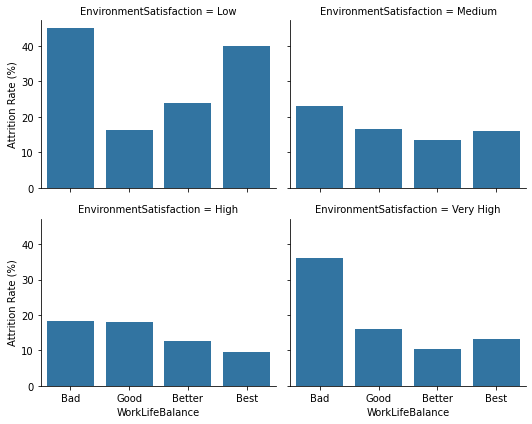

In [214]:
g = sb.FacetGrid(data=df_envSatisLife, col='EnvironmentSatisfaction', col_wrap=2, aspect=1.25)
g.map(sb.barplot, 'WorkLifeBalance', 'Attrition', order=df_workLife.index)
g.set(ylabel='Attrition Rate (%)');

In [215]:
df_OvertimeLife = analysis_hr.groupby(['WorkLifeBalance','OverTime','BusinessTravel'], as_index=False)['Attrition'].mean()
df_OvertimeLife['Attrition'] = df_OvertimeLife['Attrition'] * 100
display(df_OvertimeLife.head())

,WorkLifeBalance,OverTime,BusinessTravel,Attrition
0,Bad,False,Non-Travel,12.500000
1,Bad,False,Travel_Rarely,24.390244
2,Bad,False,Travel_Frequently,44.444444
3,Bad,True,Non-Travel,NaN
4,Bad,True,Travel_Rarely,44.444444


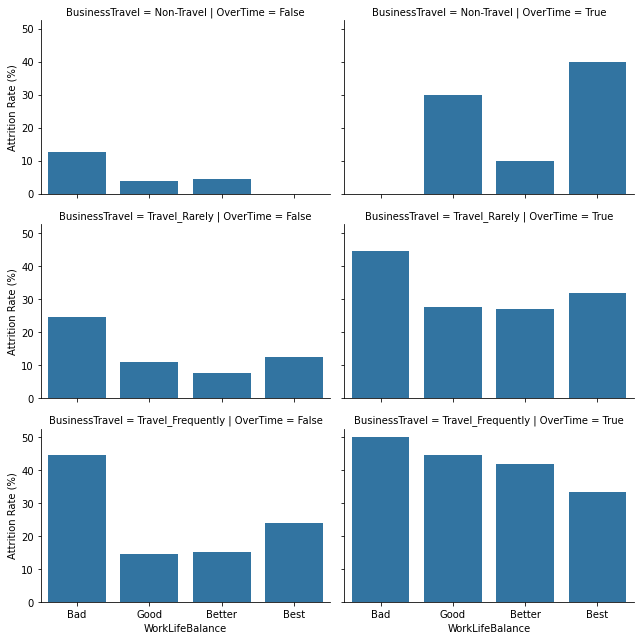

In [216]:
g = sb.FacetGrid(data=df_OvertimeLife, col='OverTime',row='BusinessTravel', aspect=1.5)
g.map(sb.barplot, 'WorkLifeBalance', 'Attrition', order=df_workLife.index)
g.set(ylabel='Attrition Rate (%)');

In [217]:
mask_a = analysis_hr['BusinessTravel'] != 'Travel_Frequently'
mask_b = analysis_hr['EnvironmentSatisfaction'] != 'Low'
masked_hr = analysis_hr.query('@mask_a and @mask_b')

wl_attr = round(masked_hr.groupby('WorkLifeBalance')['Attrition'].mean(), 2)
print(wl_attr - df_workLife)

WorkLifeBalance
Bad      -0.072500
Good     -0.028605
Better   -0.032217
Best     -0.096471
Name: Attrition, dtype: float64


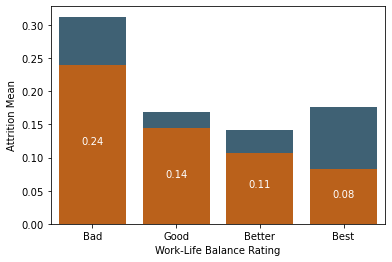

In [218]:
sb.barplot(x=df_workLife.index, y=df_workLife, color=sb.color_palette("colorblind")[0], saturation=0.3)
sb.barplot(data=masked_hr, x='WorkLifeBalance', y='Attrition', color=sb.color_palette("colorblind")[3], errorbar=None)
addlabels(wl_attr.index,wl_attr)
plt.ylabel('Attrition Mean')
plt.xlabel('Work-Life Balance Rating');

# plt.subplot(1,2,2)
# sb.barplot(x=df_workLife.index, y=df_workLife, color=sb.color_palette()[0])
# plt.ylabel('Attrition Mean')
# plt.xlabel('Work-Life Balance Rating');

After pairing features to find factors for the unusual distribution of work-life balance ratings to attrition rate, the 'best' work-life balance large attrition rates for the employees who are **frequent travellers and have low environment satisfaction**, raised suspicion on if they were the cause. Filtering the criteria out and replotting the `WorkLifeBalance` vs `Attrition` resolved the distribution into a negatively correlated outcome and shows that cutting down amount of travel and improving their work environment will reduce attrition rate as follows:
- Bad work-life balance: **-7.25%**
- Good work-life balance: **-2.86%**
- Better work-life balance: **-3.22%**
- Best work-life balance: **-9.65%**

### Conclusion

The main focus was finding the features that affect work-life balance and its relationship on the attrition rate. First looking at `EnvironmentSatisfaction` showed a higher attrition rate when employees have a low satisfaction about their work environment.
<br><br>
The next features I paired the relationship with was `OverTime` and `BusinessTravel`, highly impacted groups were employees who travel frequently with employees who have bad and best work-life balances being more at risk when they do not work overtime but there was a significant jump and a negative correlation produced for employees who travelled a lot and worked overtime.

Some interesting features I already stated above but something surprising is seeing a high attrition rate for employees with the best work life balance and a very high environment satisfaction.

## Conclusions
Every company once in a while would like to find out their current attrition rate, this was the aim of the analysis. Among 1470 employees, about 16% was affected by attrition and in turn, this became the attrition rate. After sourcing out the rate the next step was to discover possible factors on why employees leave the company. Firstly we found out group attrition rates for all categorical data and among them the only employee demographic that stood out was Marital Status, where Single employees are affected by 25.53% compared to the rest of the attrition sample. There was a surprising trend on the attrition rate in accordance to Work-Life Balance  of employees where one would expect a negative correlation from Bad to Best ratings but got an unusual spike on Best rating making it the second high attrition rate after Bad rating of this group. This outcome commanded further investigation hence after pairing it with other features like `EnvironmentSatisfaction` there was a similar distribution but when the employees were very satisfied with their work environment. `OverTime` and `BusinessTravel` was also included as part of the investigation. Therefore after altering the selected sample to not include those with low environment satisfaction, overtime workers and those who travel frequently for work, it resulted in the negative correlation also decreasing as follows:

- Bad work-life balance: **-7.25%**
- Good work-life balance: **-2.86%**
- Better work-life balance: **-3.22%**
- Best work-life balance: **-9.65%**

There was also some exploration with numerical data where no strong correlation was found with the target `Attrition` but found some correlation between `Age` and `TotalWorkingYears`. The result highlighted the companies age diversity of hiring from 18-60 but also not taking regards of the number of working years/experience in regards to their age, as there were employees more than 38 years of age to 60 years who had little to no experience.

Therefore by removing factors that compromises an employees work-life balance with removing frequent business travel and improving their work environment would significantly lower the companies attrition rate.

In [219]:
from subprocess import call
call(['python', '-m', 'nbconvert','--to','html', 'employee_attrition_analysis.ipynb'])

[NbConvertApp] Converting notebook employee_attrition_analysis.ipynb to html
[NbConvertApp] Writing 1291976 bytes to employee_attrition_analysis.html


0